In [13]:
import pandas as pd
pumpkins = pd.read_csv("../data/US-pumpkins.csv")
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [14]:
pumpkins.isnull().sum()
# 缺少数据统计，输出为列名和对应列得缺失数据

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [15]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
# for 循环筛选列
pumpkins.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


In [16]:
# assume avg price = (lowest price + highest price)/2
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2

# get month and set into the 'Month' column of dataframe
month = pd.DatetimeIndex(pumpkins['Date']).month


In [17]:
# set as a new dataframe
new_pumpkins = pd.DataFrame({
    'Month': month, 
    'Package':pumpkins['Package'],
    'Low Price': pumpkins['Low Price'],
    'High Price': pumpkins['High Price'],
    'Price': price
})
new_pumpkins.head()
new_pumpkins['Package'].unique()


array(['24 inch bins', '36 inch bins', '50 lb sacks',
       '1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bins', '35 lb cartons',
       'each', '20 lb cartons', '50 lb cartons', '40 lb cartons',
       'bushel baskets', '22 lb cartons'], dtype=object)

In [18]:
# 过滤器，仅选择列为蒲式单位的南瓜数据
new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
new_pumpkins['Package'].unique()

array(['1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bushel baskets'],
      dtype=object)

In [19]:
# 针对不同bushl单位的进行处理，如1 1/9 和 1/2 进行统一处理
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


In [20]:
import matplotlib.pyplot as plt

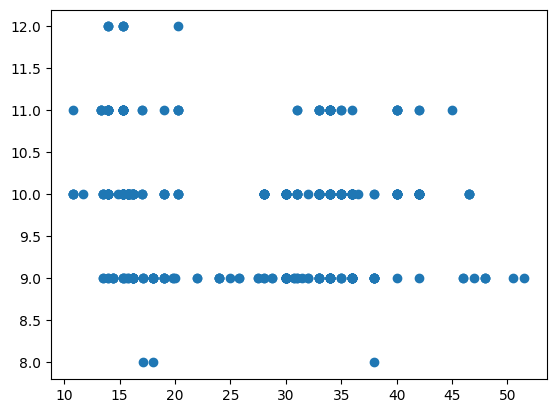

In [21]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

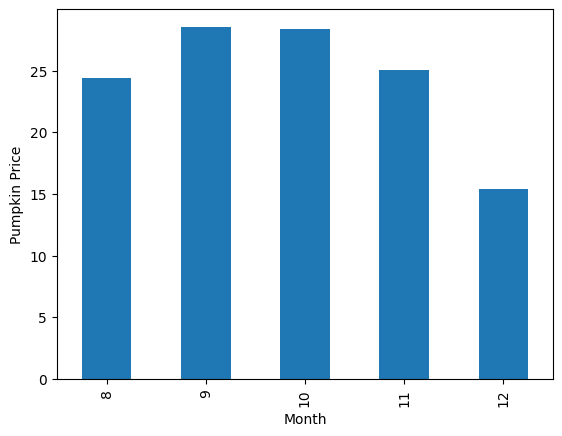

In [22]:
# 分布柱状图
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
# groupby，对month进行分组；再对响应的price列计算平均值
plt.ylabel('Pumpkin Price')

<Axes: >

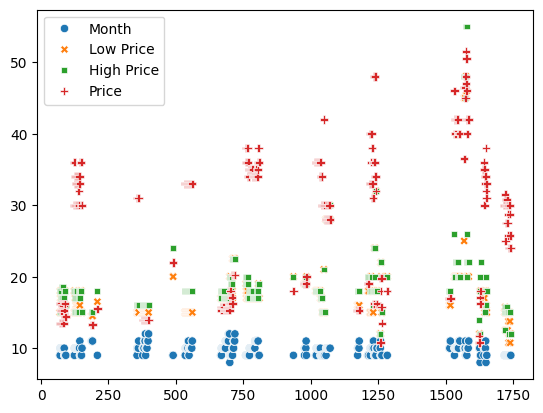

In [23]:
import seaborn as sns
sns.scatterplot(data=new_pumpkins)


<Axes: xlabel='Month', ylabel='Price'>

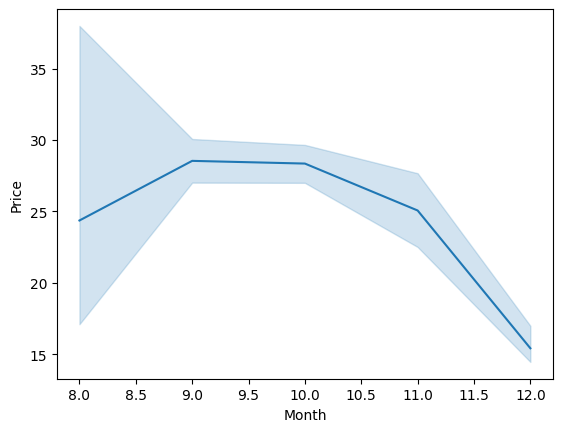

In [24]:
sns.lineplot(y="Price", x="Month", data=new_pumpkins)

<Axes: xlabel='Month', ylabel='Price'>

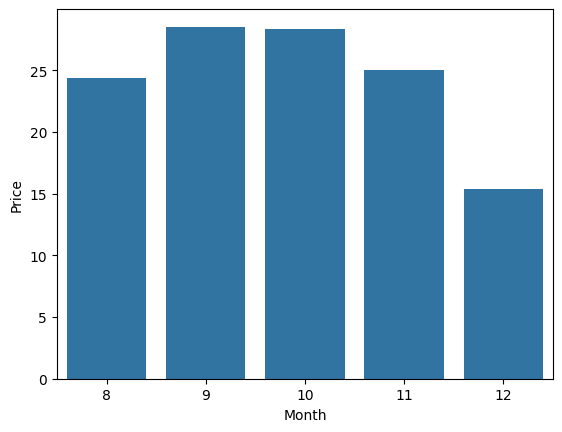

In [ ]:
mean_pumpkins = pd.DataFrame({
    'Month': new_pumpkins.groupby("Month")['Price'].mean().reset_index()['Month'], 
    'Price': new_pumpkins.groupby("Month")['Price'].mean().reset_index()['Price']})
sns.barplot(y="Price", x="Month", data=mean_pumpkins)

# grouped = new_pumpkins.groupby("Month")['Price'].mean().reset_index()
# mean_pumpkins = pd.DataFrame({
#     'Month': grouped['Month'], 
#     'Price': grouped['Price']
# })
